# Mean Squared Error (MSE)
The examples in this tutorial build on those in the Mean Absolute Error (MAE) tutorial. It is recommended you review the MAE tutorial before this one.

In [1]:
from scores.continuous import mae
from scores.continuous import mse

In [2]:
# Uncomment the line below to view detailed help information on the arguments to the MSE function
# help(mse)

# Use MSE to Focus on Large Anomalies; Don't Sweat the Small Stuff
MSE is sensitive to large errors.

MSE is a fair measure of error if you are forecasting the mean value. Minimising the MSE can be used as a training or objective function for machine learning to obtain a forecast that is the mean of a full probabilistic forecast.

Using the MSE instead of MAE, or forecasting mean instead of median, is appropriate if big errors are considered much worse than small ones. For example, you might not mind if the temperature is 1 degree different but really care if it's 30 degrees different and want to treat the 30 degree error as 900 times worse than the 1 degree error.

The units of MSE do not match the units of the forecasts or observations. 

In [3]:
import numpy
import pandas
import xarray
import matplotlib.pyplot as plt

In [4]:
# Import the same gridded forecasts and one gridded analysis used in the MSE tutorial
forecast = xarray.open_dataset("forecast_grid.nc")
analysis = xarray.open_dataset("analysis_grid.nc")

# Spatial Structure of Change
Similarly to the MAE tutorial, we will compute the mean square difference of the forecasts (at all 240 lead times) compared to the first predicted hour. While this says nothing about forecast accuracy, it does allow us to visualise which parts of the globe change more than others through the period. Using MSE instead of MAE really focuses the attention on the largest differences.

Here we plot both the mean absolute difference (Figure 1, calculated using mae) and the mean squared difference (Figure 2, calculated using mse). 

Both figures show that the temperature over land changes differently to temperature over the ocean. Figure 2 (the mean squared difference) highlights the areas with the largest changes in the forecast period.

In [5]:
# Calculate the mean differences using mae and mse
meanAbsoluteDifference = mae(forecast.temp_scrn, forecast.temp_scrn[0], reduce_dims="time")
meanSquaredDifference = mse(forecast.temp_scrn, forecast.temp_scrn[0], reduce_dims="time")

Text(0.5, 1.0, 'Surface Temperature')

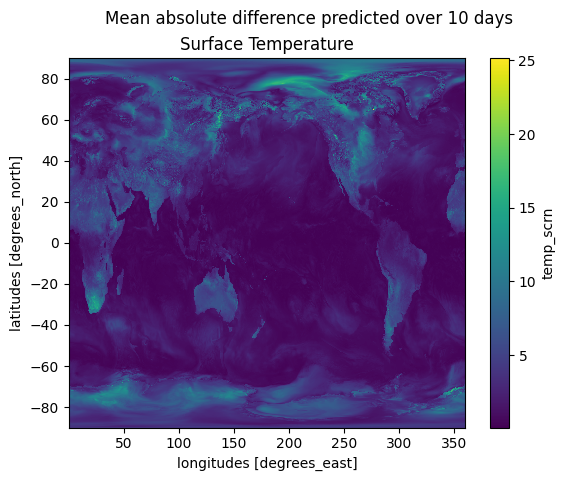

In [6]:
# Figure One - Mean Absolute Difference of Predictions compared to first time step
meanAbsoluteDifference.plot()
plt.suptitle("Mean absolute difference predicted over 10 days")
plt.title("Surface Temperature")

Text(0.5, 1.0, 'Surface Temperature')

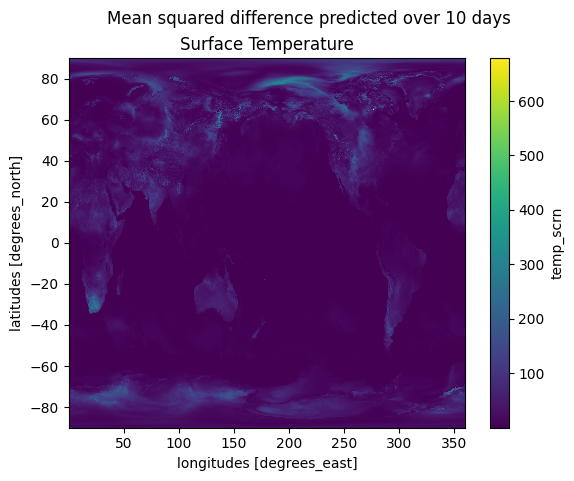

In [7]:
# Figure Two - Mean Squared Difference of Predictions compared to first time step
meanSquaredDifference.plot()
plt.suptitle("Mean squared difference predicted over 10 days")
plt.title("Surface Temperature")

# Some Verification
As with the MAE tutorial, the forecast time step 24*4 - 1 has the same validity as the analysis, both being 00UTC on 24 November 2022.

If you want more information about matching the forecast time step to the observation time step, see the tutorial on Mean Absolute Error.

We show both the mean absolute error and the mean squared error in the figures below.

In [8]:
# Extract the forecast of interest, to compare to analysis.temp_scrn
forecast_of_interest = forecast.temp_scrn[24 * 4 - 1]

In [9]:
# Calculate the overall MAE and MSE
mae_overall = mae(forecast_of_interest, analysis.temp_scrn)
mse_overall = mse(forecast_of_interest, analysis.temp_scrn)

In [10]:
# Recall that MAE and MSE have different units.
print("MAE: ", mae_overall.values.round(2))
print("MSE: ", mse_overall.values.round(2))

MAE:  1.45
MSE:  6.11


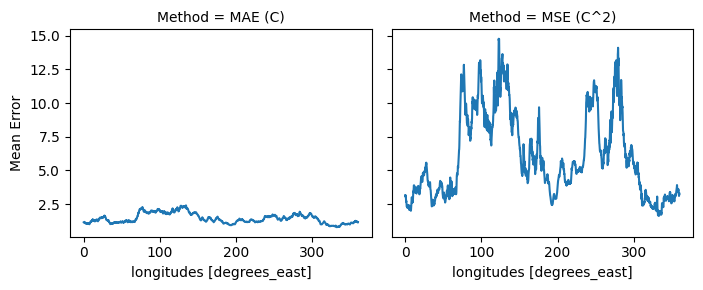

In [11]:
# Figure 3 - MAE and MSE as a function of longitude
mae_by_longitude = mae(forecast_of_interest, analysis.temp_scrn, preserve_dims="lon")
mse_by_longitude = mse(forecast_of_interest, analysis.temp_scrn, preserve_dims="lon")

# Prepare some labelling for the graph
mae_by_longitude.name = "Mean Error"
mse_by_longitude.name = "Mean Error"
names = pandas.Index(["MAE (C)", "MSE (C^2)"], name="Method")
xarray.concat([mae_by_longitude, mse_by_longitude], dim=names).plot(col="Method")

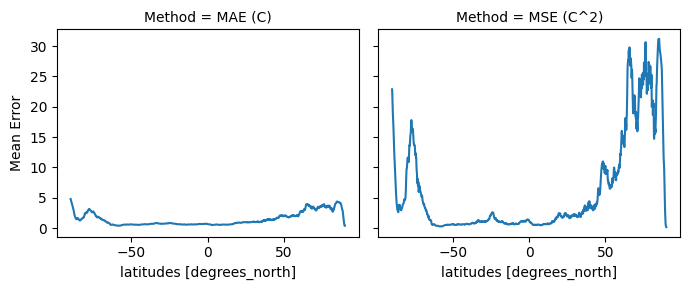

In [12]:
# Figure 4 - MAE and MSE as a function of latitude
mae_by_latitude = mae(forecast_of_interest, analysis.temp_scrn, reduce_dims="lon")
mse_by_latitude = mse(forecast_of_interest, analysis.temp_scrn, reduce_dims="lon")

# Prepare some labelling for the graph
mae_by_latitude.name = "Mean Error"
mse_by_latitude.name = "Mean Error"

xarray.concat([mae_by_latitude, mse_by_latitude], dim=names).plot(col="Method")

Whether using MAE or MSE the forecast errors generally increase towards the poles. To see the pattern more clearing in the MAE plot, it would help to change the range. 

**Things to try next**

Explore the `weights` option within mse. The tutorial Weighting_Results might assist with this.

Explore the `angular` option within mse, relevant if forecasting direction in degrees.

Explore the Root_Mean_Squared_Error tutorial which compares rmse and mse to mae.